<a href="https://colab.research.google.com/github/gluten-morgen/Neural_Network_from_Scratch/blob/master/digit_recognition_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Display the results of the Neural Network.

The trained weights are loaded and random samples of the test set (containing 10000 samples) are fed
through the Neural Network and are displayed.

The samples contain images of size 28 x 28 pixels, as well as the true labels.

The displayed image is labelled with the actual and predicted output, and the predicted output is
printed on the console as well.


**--- Architecture of the Neural Network: ---**

Input Layer : 784 inputs

Hidden Layer 1 : 256 nodes , Activation : ReLU

Hidden Layer 2 : 512 nodes , Activation :  Sigmoid

Hidden Layer 3 : 256 nodes , Activation : Sigmoid

Output Layer : 10 outputs , Activation : Softmax


Note: The trained weights have a 94.39% accuracy on the test data.

Dataset downloaded from Kaggle (https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download)
under the Creative Commons license.

# Note

## Upload these files to run:
- NeuralNetwork.py
- mnist_test.csv
- mnist_weights_9439.pkl



********* Prediction: 7 *********




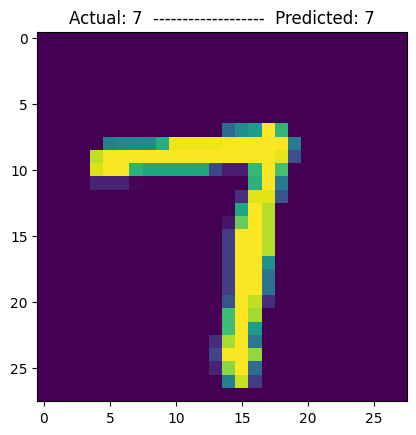

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 6 *********




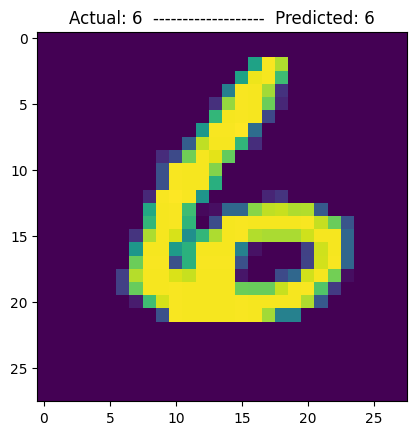

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 3 *********




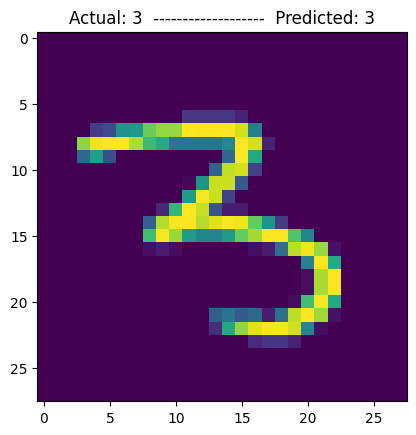

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 3 *********




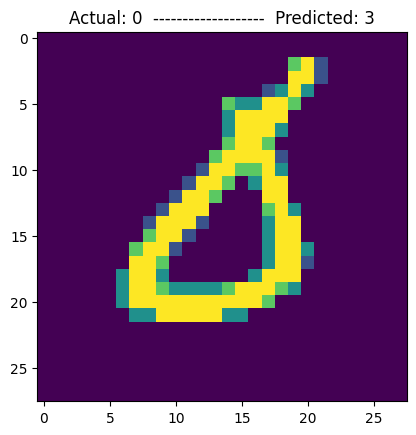

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 9 *********




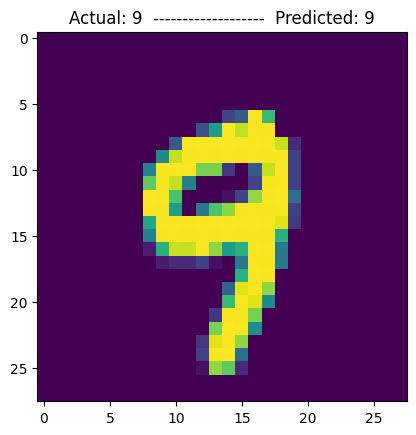

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 2 *********




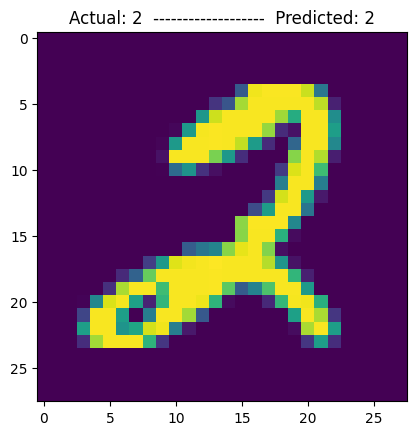

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 9 *********




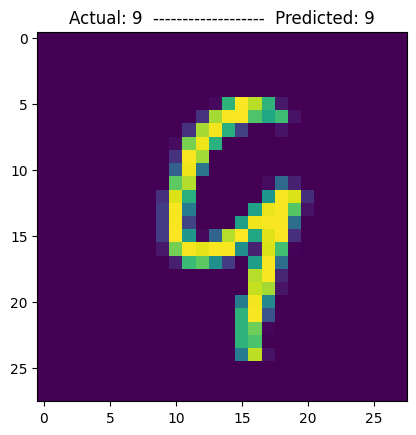

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 3 *********




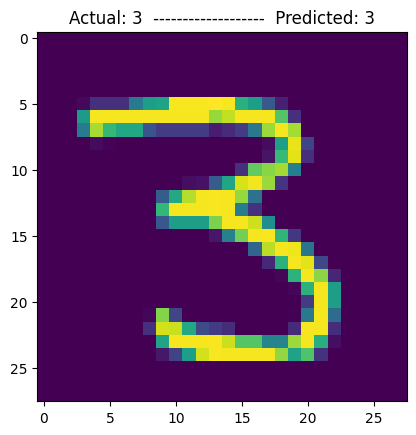

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 1 *********




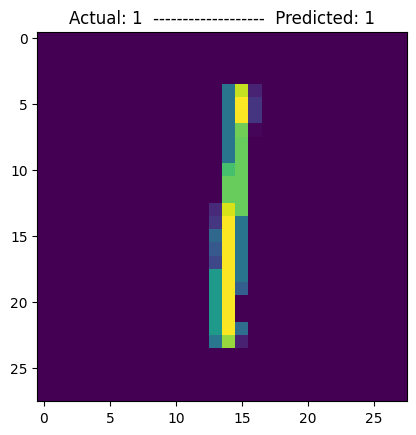

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 1 *********




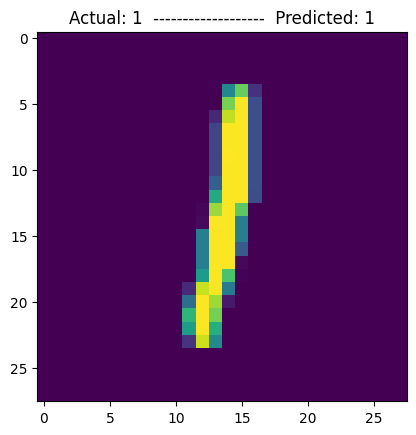

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 4 *********




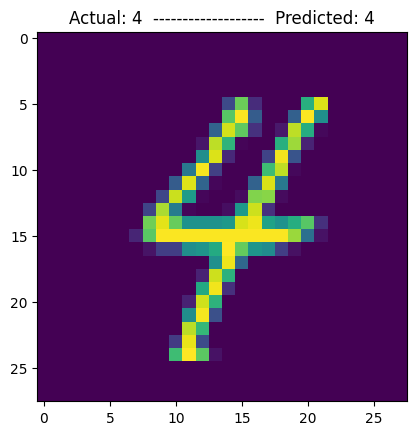

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 0 *********




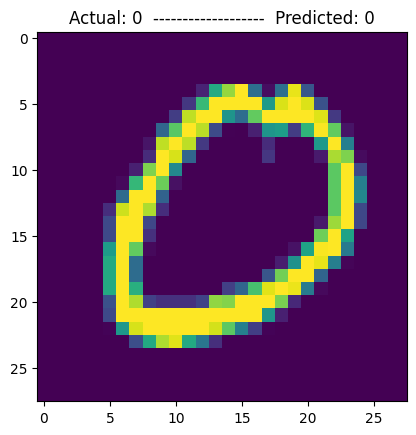

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 9 *********




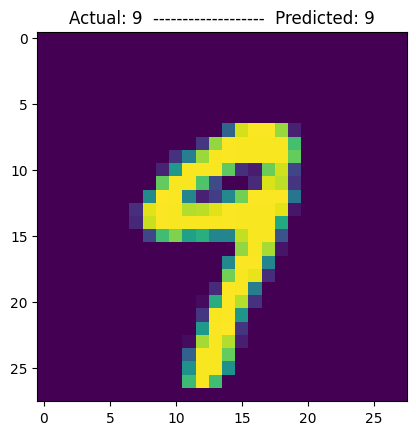

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 7 *********




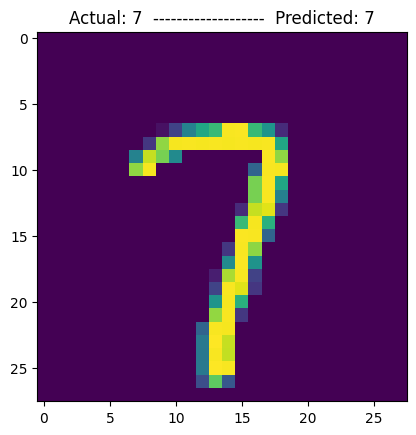

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 4 *********




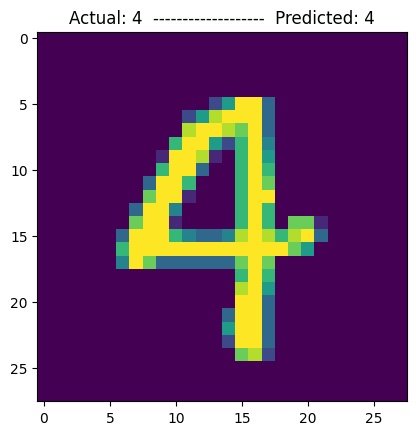

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 8 *********




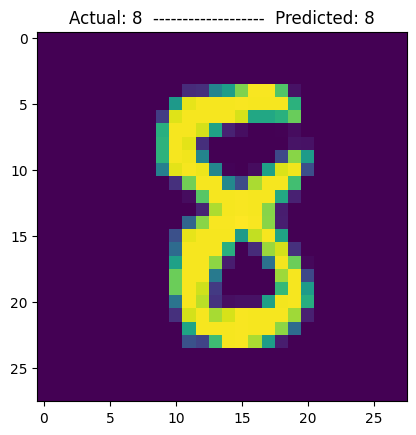

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 7 *********




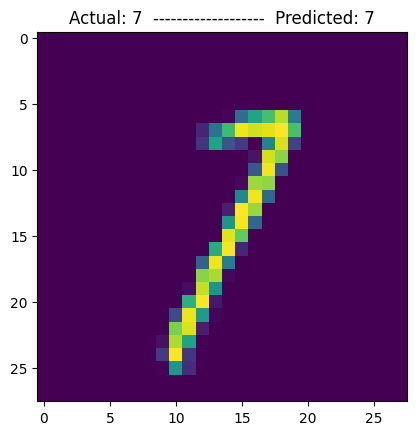

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 0 *********




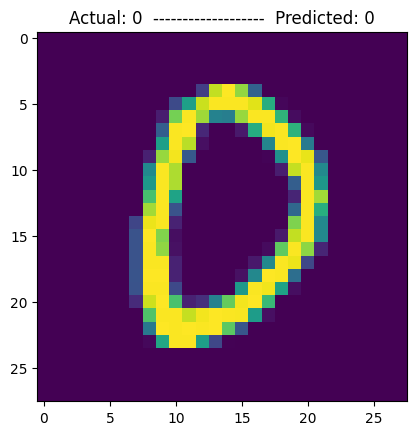

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 0 *********




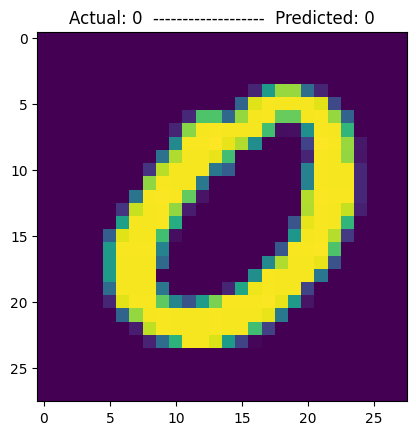

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 1 *********




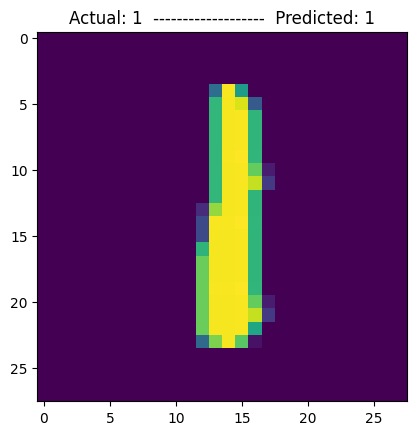

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 1 *********




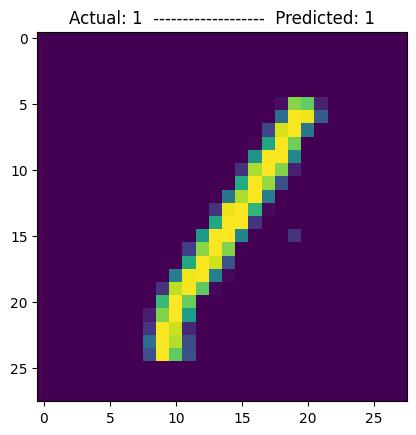

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 1 *********




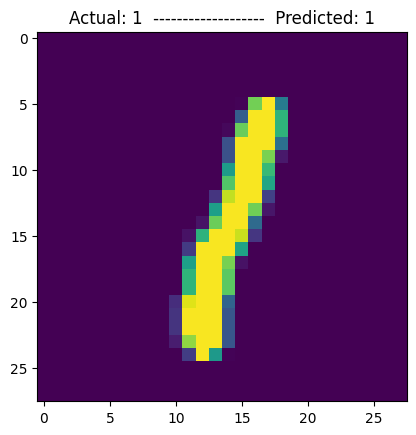

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 6 *********




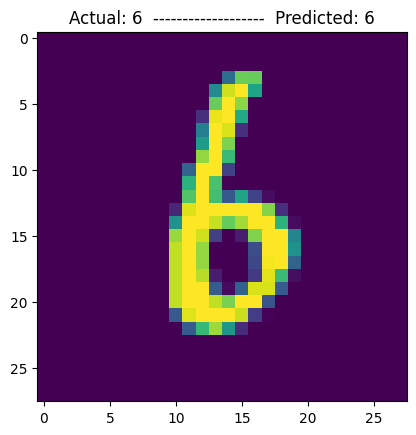

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 1 *********




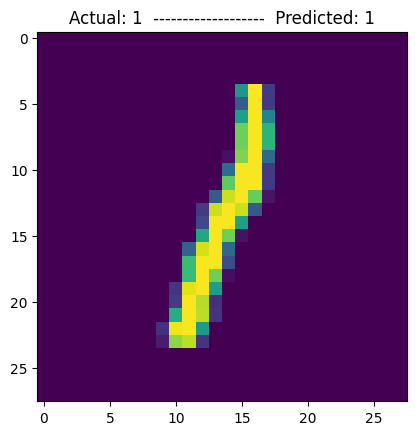

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 7 *********




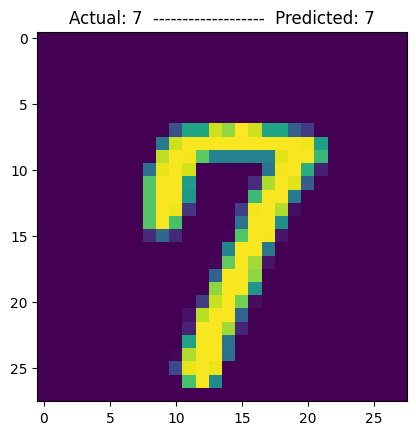

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 2 *********




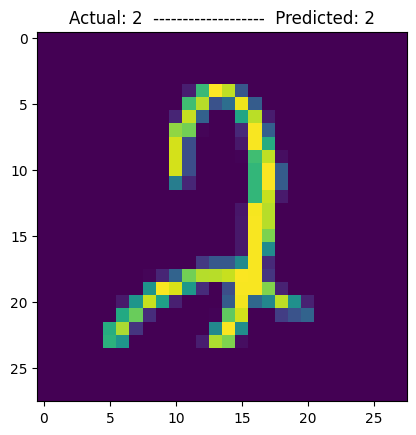

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 0 *********




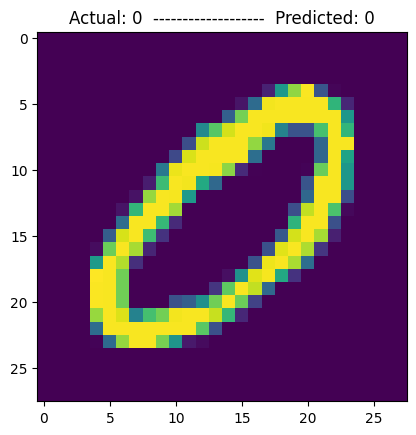

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 3 *********




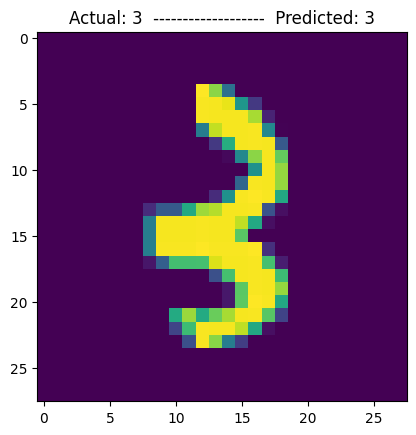

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 1 *********




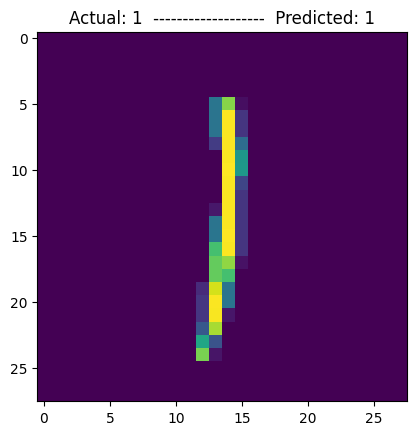

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 2 *********




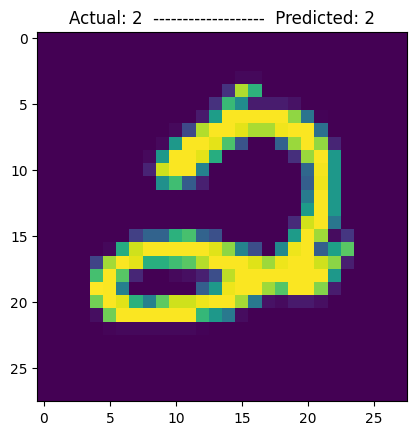

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 5 *********




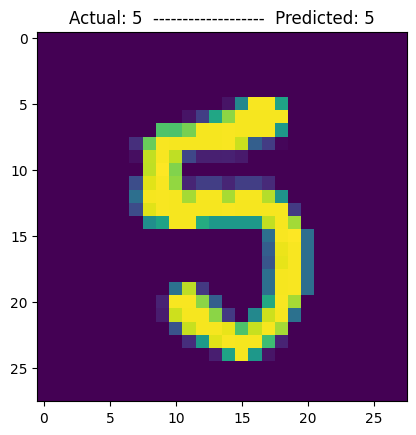

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 5 *********




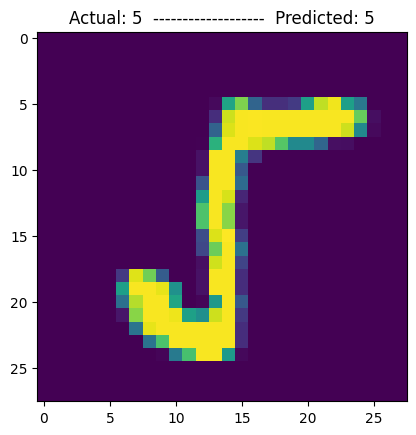

Press ENTER to continue, or 'Q' to quit.



********* Prediction: 8 *********




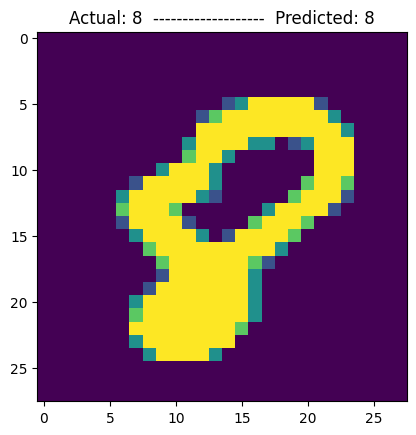

Press ENTER to continue, or 'Q' to quit.
q


In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer
from NeuralNetwork import NN
import random



# load test dataset
dataset_test = pd.read_csv('mnist_test.csv')


# get X and y values
X_test  = dataset_test.iloc[:, 1:].values
y_test_labels  = dataset_test.iloc[:, 0].values


# outputs to labels
def outputs_to_labels(batch_outputs:np.ndarray):
    labels = None
    for batch in batch_outputs:
        for output in batch:
            label = np.argmax(output)
            if isinstance(labels, np.ndarray):
                labels = np.append(labels, label)
            else:
                labels = np.array([label])

    return labels


# create neural network
layer1 = NN(inputs=784, outputs=256, activation='relu', load_weights=True, filename='mnist_weights_9439')
layer2 = NN(inputs=256, outputs=512, activation='sigmoid')
layer3 = NN(inputs=512, outputs=256, activation='sigmoid')
layer4 = NN(inputs=256, outputs=10, activation='softmax')


norm = Normalizer()


while True:

    # select a random index
    random_idx = random.randint(0, X_test.shape[0]-1)
    X_test_select = X_test[random_idx, :]
    # convert to 2D matrix for normalizer
    X_test_select = X_test_select[np.newaxis, :]

    # normalize data
    X_test_select = norm.fit_transform(X_test_select)

    # convert to 3D tensor for Neural Network
    X_test_select = X_test_select[np.newaxis, :, :]

    y = y_test_labels[random_idx]

    # forward propagate
    y_pred = layer1.forward(X_test_select)
    y_pred = layer2.forward(y_pred)
    y_pred = layer3.forward(y_pred)
    y_pred = layer4.forward(y_pred)

    # get the labels from y_pred
    y_pred = outputs_to_labels(y_pred).squeeze()


    print(f'\n\n********* Prediction: {y_pred} *********\n\n')

    # display the image
    img = X_test_select.squeeze().reshape(28, 28)
    imgplt = plt.imshow(img)
    plt.title(f'Actual: {y}  -------------------  Predicted: {y_pred}')
    plt.show()

    print('Press ENTER to continue, or \'Q\' to quit.')
    inp = input()
    if inp == 'Q' or inp =='q':
      break
